In [62]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image, flip=True, cmap=None, figsize=(6, 6), **kwargs):
    if flip:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
    # adjustment for histograms
    if kwargs.get("is_histogram", False):
        plt.figure(figsize=figsize)
        plt.plot(image)
    else:
        width=image.shape[1] 
        height=image.shape[0]
        margin=50 
        # dots per inch
        dpi=100.
        # inches
        figsize=((width+2*margin)/dpi, (height+2*margin)/dpi)
        #axes ratio
        left = margin/dpi/figsize[0] 
        bottom = margin/dpi/figsize[1]
        fig = plt.figure(figsize=figsize, dpi=dpi)
        fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)
        _ = plt.imshow(image, cmap=cmap)
        plt.axis("off")
    plt.title(kwargs.get("title", None))
    plt.xlabel(kwargs.get("xlabel", None))
    plt.ylabel(kwargs.get("ylabel", None))
    plt.xlim(kwargs.get("xlim", None))
    plt.show()
    
def display_histogram(histograms, figsize=(6, 6), **kwargs):
    plt.figure(figsize=figsize)
    plt.title(kwargs.get("title", None))
    plt.xlabel(kwargs.get("xlabel", None))
    plt.ylabel(kwargs.get("ylabel", None))
    plt.xlim(kwargs.get("xlim", None))
    for h, c in histograms:
        plt.plot(h, color=c)
    plt.show()

#### Grayscale Histograms

 - cv2.calcHist(images, channels, mask, histSize, ranges)


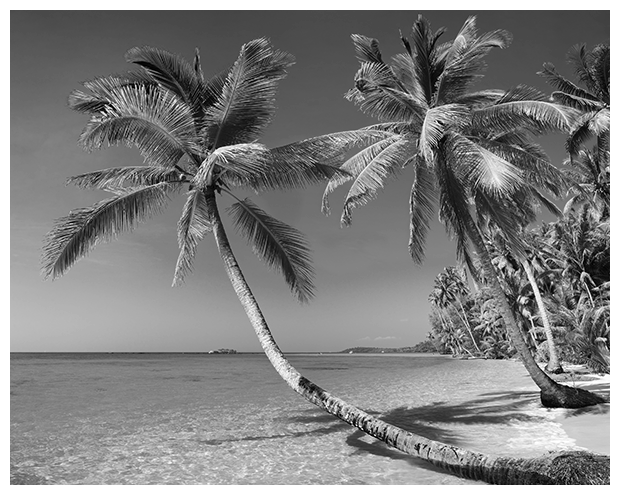

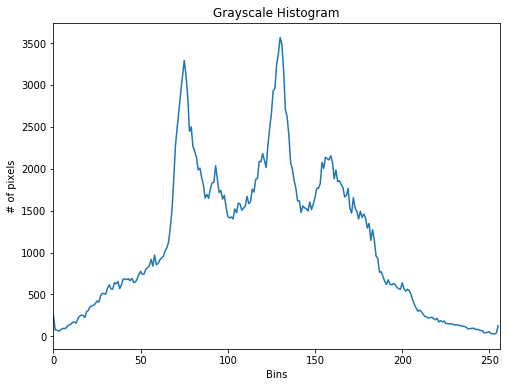

In [53]:
image = cv2.imread("images/beach.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# calculate histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

display(gray, flip=False, cmap="gray")
display(
    hist, flip=False, is_histogram=True, figsize=(8, 6),
    xlim=[0, 256], xlabel="Bins", ylabel="# of pixels",
    title="Grayscale Histogram"
)


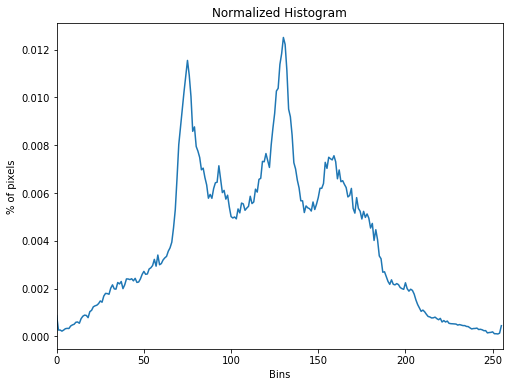

In [54]:
# normalized histogram
hist_normal = hist/hist.sum()
display(
    hist_normal, flip=False, is_histogram=True, figsize=(8, 6),
    xlim=[0, 256], xlabel="Bins", ylabel="% of pixels",
    title="Normalized Histogram"
)

#### Color Histograms

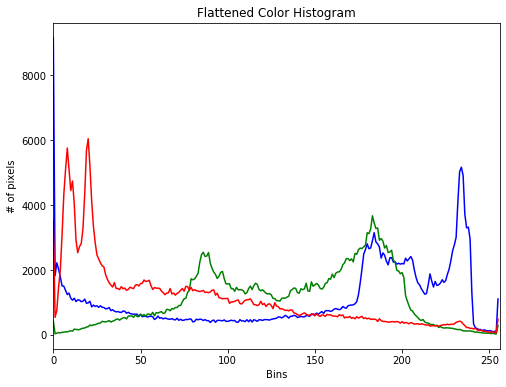

In [66]:
b, g, r = cv2.split(image)
hists = []
for c, name in [(b, "Blue"), (g, "Green"), (r, "Red")]:
    hists.append((cv2.calcHist([c], [0], None, [256], [0, 256]), name))
display_histogram(
    hists, xlim=[0, 256], xlabel="Bins", ylabel="# of pixels",
    title="Flattened Color Histogram", figsize=(8, 6)
)



#### Multi-Dimensional Histograms

2D histogram shape: (32, 32), with 1024 values


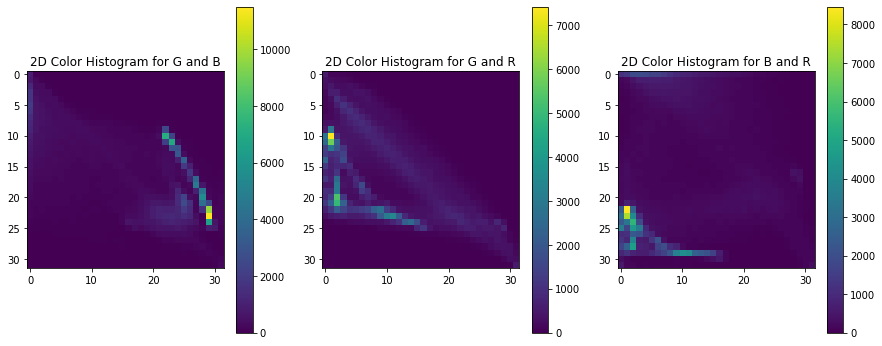

In [73]:
# 2D Histogram

fig = plt.figure(figsize=(15, 6))
# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([g, b], [0, 1], None, [32, 32],
    [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)
 
# plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([g, r], [0, 1], None, [32, 32],
    [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)
 
# plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([b, r], [0, 1], None, [32, 32],
    [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)
 
# finally, let's examine the dimensionality of one of the 2D
# histograms
print("2D histogram shape: {}, with {} values".format(
    hist.shape, hist.flatten().shape[0]))

In [ ]:
# 3D Histogram



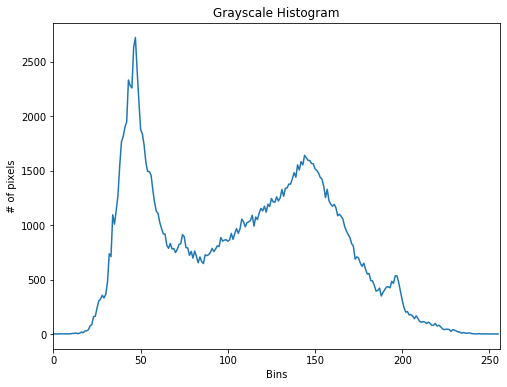

In [74]:
# 
image = cv2.imread("images/horseshoe_bend.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
display(
    hist, flip=False, is_histogram=True, figsize=(8, 6),
    xlim=[0, 256], xlabel="Bins", ylabel="# of pixels",
    title="Grayscale Histogram"
)

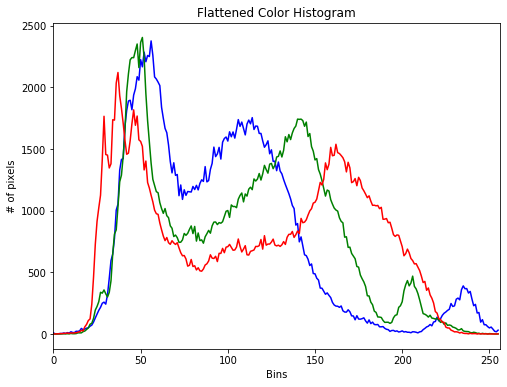

In [75]:
b, g, r = cv2.split(image)
hists = []
for c, name in [(b, "Blue"), (g, "Green"), (r, "Red")]:
    hists.append((cv2.calcHist([c], [0], None, [256], [0, 256]), name))
display_histogram(
    hists, xlim=[0, 256], xlabel="Bins", ylabel="# of pixels",
    title="Flattened Color Histogram", figsize=(8, 6)
)

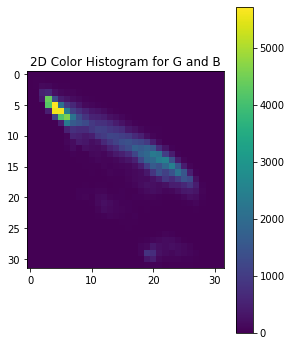

In [76]:
fig = plt.figure(figsize=(15, 6))
# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([b, r], [0, 1], None, [32, 32],
    [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

In [77]:
eq = cv2.equalizeHist(gray)
eq[272, 146]

210

In [78]:
hist = cv2.calcHist([image], [0, 1, 2],
    None, [8, 16, 9], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
    hist.shape, hist.flatten().shape[0]))

3D histogram shape: (8, 16, 9), with 1152 values
